In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = 'income.csv'
data = pd.read_csv(link)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
X = data.drop('fnlwgt',axis = 1)
y = data['fnlwgt']

In [8]:
print (X.shape,y.shape)

(32561, 14) (32561,)


In [9]:
num = X.select_dtypes(include=['int64'])
cat = X.select_dtypes(exclude=['int64'])



In [10]:
num.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [11]:
cat.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

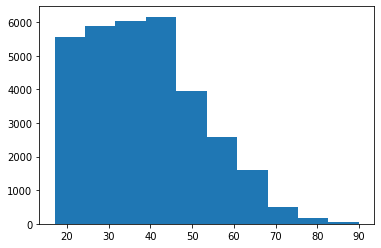

In [12]:
plt.hist(num.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b8267e110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b8267eb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b82672490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b826825d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b82682ad0>],
 'means': []}

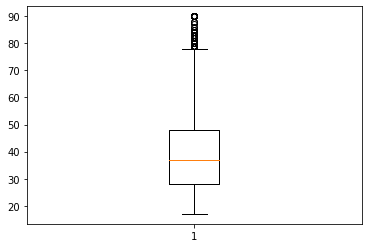

In [13]:
plt.boxplot(num.age)

Mean: 38.58164675532078


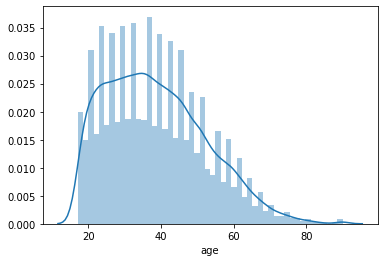

In [14]:
sns.distplot(num.age)
print("Mean:",num.age.mean())

In [15]:
num.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

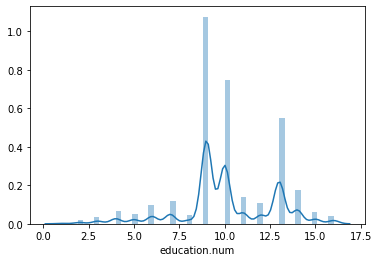

In [16]:
sns.distplot(num['education.num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b823e1450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b823e1f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b823da7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b823e8990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b823e8e90>],
 'means': []}

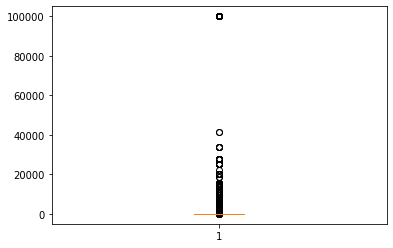

In [17]:
plt.boxplot(num['capital.gain'])

In [18]:
out = num[num['capital.gain'] > 15000].index.tolist()

In [19]:
len(out)

613

In [20]:
num.drop(out,axis=0,inplace=True)
y.drop(out,axis=0,inplace=True)

/home/jitmanewtyagi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b82302750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b822f8b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b822f8ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b82288c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b82302d90>],
 'means': []}

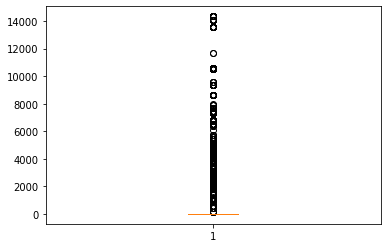

In [21]:
plt.boxplot(num['capital.gain'])

(array([  728.,  2181.,  2302., 17528.,  3062.,  3700.,  1693.,   427.,
          191.,   136.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

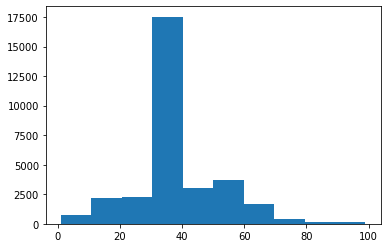

In [22]:
plt.hist(num['hours.per.week'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b821fd190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b821fdc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b821f6510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b821836d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b82183bd0>],
 'means': []}

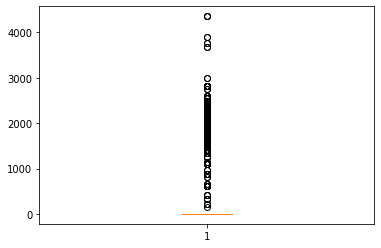

In [24]:
plt.boxplot(num['capital.loss'])

In [25]:
cat.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [26]:
cat.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
len(cat[cat.workclass == '?'])

1836

In [28]:
cat.workclass.mode()

0    Private
dtype: object

In [35]:
cat.workclass = cat.workclass.apply(lambda x: x.replace('?','Private') if x == '?' else x)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

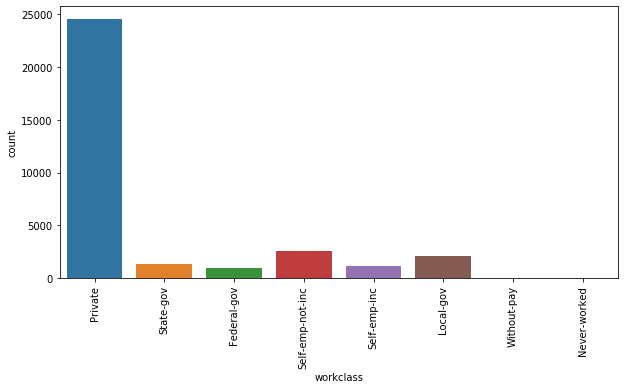

In [45]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.workclass)
plt.plot

In [38]:
cat.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

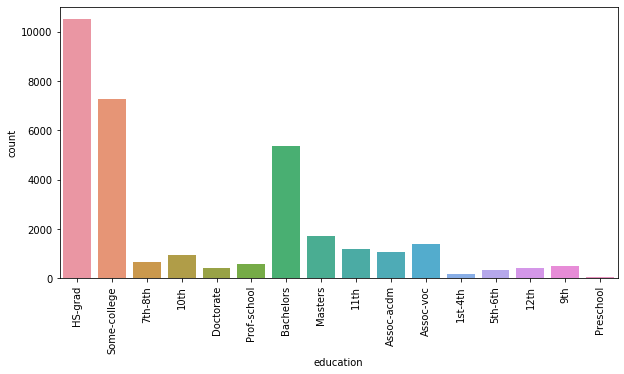

In [46]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.education)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

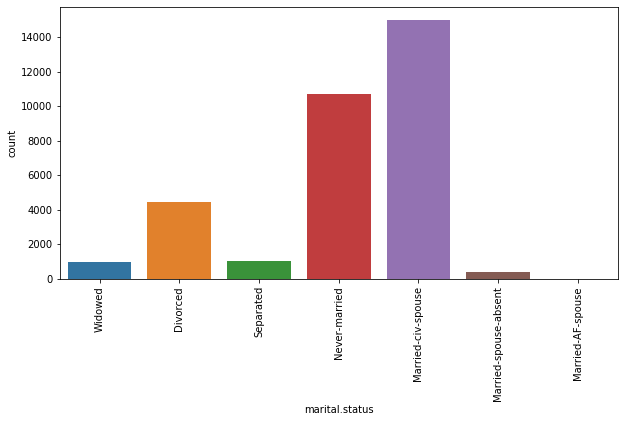

In [47]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat['marital.status'])
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

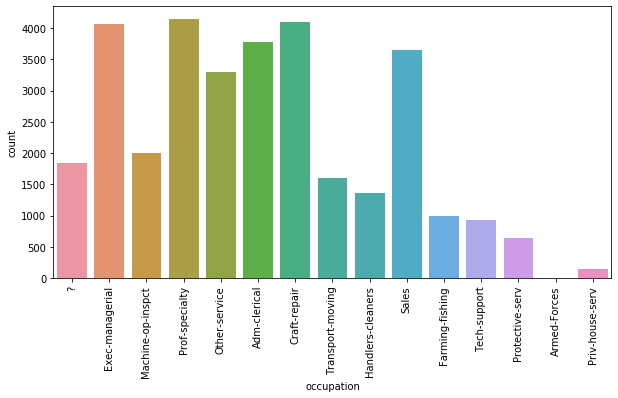

In [48]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.occupation)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

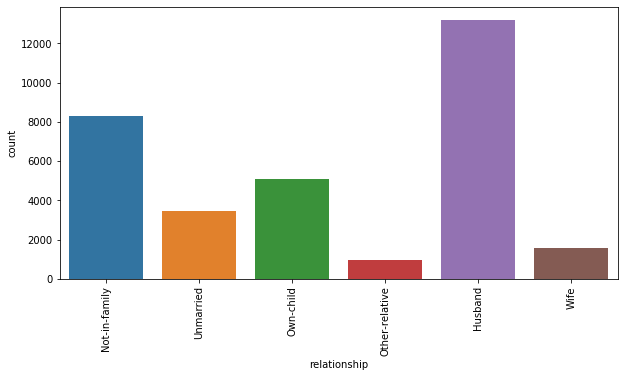

In [49]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.relationship)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

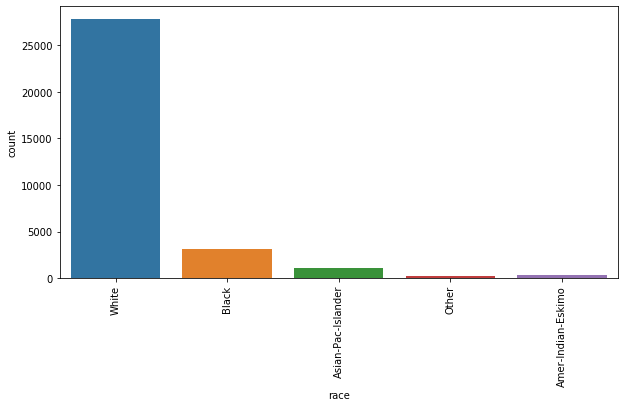

In [50]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.race)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

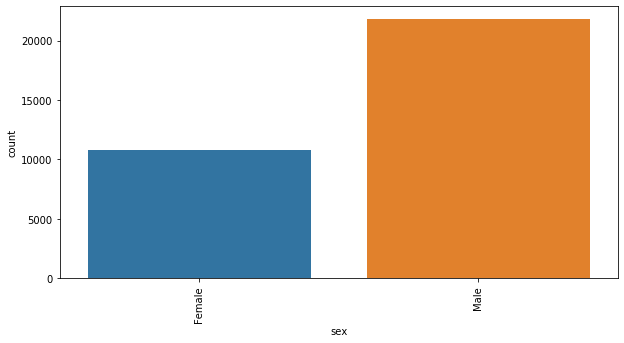

In [51]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat.sex)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

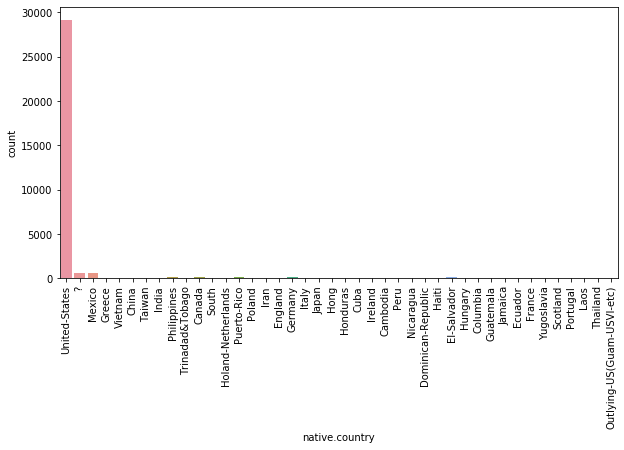

In [52]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat['native.country'])
plt.plot

In [54]:
cat['native.country'] = cat['native.country'].apply(lambda x: x.replace('?','Private') if x == '?' else x)

/home/jitmanewtyagi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

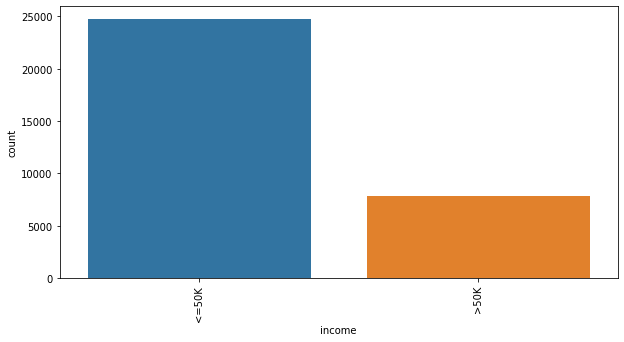

In [55]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.countplot(cat['income'])
plt.plot